# Importação de pacotes

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from matplotlib import pyplot as plt

# Importação do banco de dados e definição dos conjuntos de treino e de teste

In [14]:
cols = ["word_freq_make",         
  "word_freq_address",
  "word_freq_all",          
  "word_freq_3d",           
  "word_freq_our",          
  "word_freq_over",         
  "word_freq_remove",       
  "word_freq_internet",     
  "word_freq_order",        
  "word_freq_mail",         
  "word_freq_receive",      
  "word_freq_will",         
  "word_freq_people",       
  "word_freq_report",       
  "word_freq_addresses",    
  "word_freq_free",         
  "word_freq_business",
  "word_freq_email",        
  "word_freq_you",          
  "word_freq_credit",       
  "word_freq_your",         
  "word_freq_font",         
  "word_freq_000",          
  "word_freq_money",        
  "word_freq_hp",           
  "word_freq_hpl",          
  "word_freq_george",       
  "word_freq_650",          
  "word_freq_lab",          
  "word_freq_labs",         
  "word_freq_telnet",       
  "word_freq_857",          
  "word_freq_data",         
  "word_freq_415",          
  "word_freq_85",           
  "word_freq_technology",   
  "word_freq_1999",         
  "word_freq_parts",        
  "word_freq_pm",           
  "word_freq_direct",       
  "word_freq_cs",           
  "word_freq_meeting",      
  "word_freq_original",     
  "word_freq_project",      
  "word_freq_re",           
  "word_freq_edu",          
  "word_freq_table",        
  "word_freq_conference",   
  "char_freq_comma",            
  "char_freq_parentheses",            
  "char_freq_key",            
  "char_freq_exclamation",
  "char_freq_dollar",            
  "char_freq_hashtag",            
  "capital_run_length_average",
  "capital_run_length_longest", 
  "capital_run_length_total",
  "spam"]
wd = "C:/Users/marco/Desktop/Estatistica/Semestres/Semestre 8/Tópicos em Estatística 1 (Deep Learning)/Trabalho/"
data = pd.read_csv(wd + 'spambase.data', names = cols)
X = data.loc[:, data.columns != 'spam']
y = data.spam
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size = 0.30)

In [15]:
data[:5]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_comma,char_freq_parentheses,char_freq_key,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Padronização dos dados das covariáveis
No banco de dados utilizado, há variáveis com magnitudes e medidas bastante discrepantes. Por exemplo, covariáveis que são porcentagens e covariáveis que correspondem a contagens.

In [16]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(train_X)
val_X_scale = scaler.fit_transform(val_X)

# Ajuste da Rede Neural
É ajustada uma rede neural simples, com todas as 57 covariáveis possíveis.

In [17]:
# Rede Neural Simples
train_y_array = np.array(train_y)
val_y_array = np.array(val_y)

# define the keras model
def base_model():
    model = Sequential()
    model.add(Dense(3, input_dim=train_X.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_NN = KerasClassifier(build_fn=base_model, epochs=150, batch_size=64, verbose = 0)    
model_NN.fit(X_train_scale, train_y)

y_pred = model_NN.predict(val_X_scale)
print("A acurácia no conjunto de teste é", accuracy_score(val_y, y_pred))

A acurácia no conjunto de teste é 0.9268645908761767


# Cálculo da importância das variáveis por meio do método *Permutation Importance*

In [18]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model_NN, 
                             scoring = 'accuracy',
                             cv = 'prefit',
                             n_iter = 20,
                             random_state = 47)
perm.fit(val_X_scale, val_y_array)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.0329 ± 0.0083,char_freq_dollar
0.0293 ± 0.0061,word_freq_hp
0.0242 ± 0.0096,char_freq_exclamation
0.0199 ± 0.0078,capital_run_length_longest
0.0193 ± 0.0068,word_freq_000
0.0154 ± 0.0048,word_freq_george
0.0137 ± 0.0071,word_freq_free
0.0105 ± 0.0061,word_freq_remove
0.0096 ± 0.0061,word_freq_edu
0.0091 ± 0.0040,word_freq_telnet


Text(0.5, 1.0, 'Importância das Variáveis (25 mais importantes)')

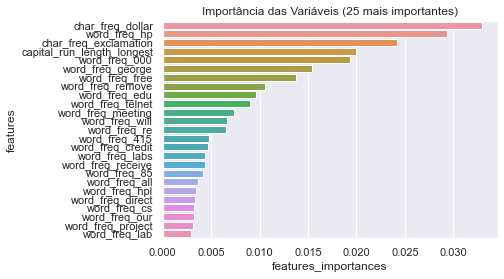

In [19]:
df = {'features' : val_X.columns.tolist(), 
     'features_importances': perm.feature_importances_.tolist(),
     'features_standard_deviations': perm.feature_importances_std_.tolist()}
df = pd.DataFrame(df).sort_values(by=['features_importances'], ascending = False)

sns.set(font_scale = 1)
ax = sns.barplot(y = "features", 
                 x = 'features_importances',
                 data = df[:25])
ax.set_title('Importância das Variáveis (25 mais importantes)')

# Ajuste da Rede Neural com apenas as 7 variáveis mais importantes

In [20]:
vars_important = df.features[0:7].tolist()
X_train_scale_important = scaler.fit_transform(train_X[vars_important])
val_X_scale_important = scaler.fit_transform(val_X[vars_important])

In [21]:
# define the keras model
def base_model():
    model = Sequential()
    model.add(Dense(3, input_dim=7, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model_NN = KerasClassifier(build_fn=base_model, epochs=150, batch_size=64, verbose = 0)    
model_NN.fit(X_train_scale_important, train_y)

y_pred = model_NN.predict(val_X_scale_important)
print("A acurácia no conjunto de teste é", accuracy_score(val_y, y_pred))

A acurácia no conjunto de teste é 0.8841419261404779
